In [1]:
#загрузка библиотек
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.stattools import kpss

In [2]:
#загрузка дата фреймов
df1 = pd.read_csv('daily-total-female-births-in-cal.csv')
df2 = pd.read_csv('mean-monthly-air-temperature-deg.csv')
df3 = pd.read_csv('monthly-boston-armed-robberies-j.csv')
df4 = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')
df5 = pd.read_csv('weekly-closings-of-the-dowjones-.csv')

In [3]:
#приведение дат в один формат и установка дат как индексов, а также замена названия столбца колонок со значениями
def date_format(*dfs):
    for df in dfs:
        df.rename(columns={'Close': 'Value', 'Deg': 'Value', 'Count': 'Value'}, inplace=True)
        for col in df.columns:
            if 'Date' in col:
                df[col] = pd.to_datetime(df[col])
                df.set_index('Date', inplace=True)
            elif 'Month' in col:
                df[col] = pd.to_datetime(df[col], format='%Y-%m')
                df.set_index('Month', inplace=True)
            elif 'Week' in col:
                df[col] = df[col].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-W%W-%w"))
                df.set_index('Week', inplace=True)
            else:
                pass
        df.info()

        
df_date = date_format(df1, df2, df3, df4, df5)
df_date


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 1959-01-01 to 1959-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   365 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 240 entries, 1920-01-01 to 1939-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   240 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 1966-01-01 to 1975-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   118 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 1965-01-01 to 1971-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0

            Value
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44
...           ...
1959-12-27     37
1959-12-28     52
1959-12-29     48
1959-12-30     55
1959-12-31     50

[365 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Единичных корней нет, ряд стационарный


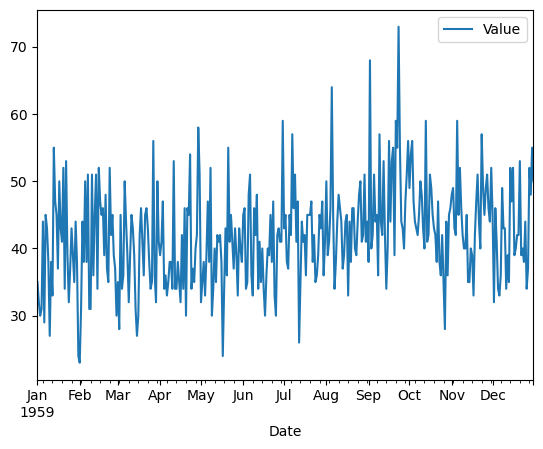

----------
            Value
Month            
1920-01-01   40.6
1920-02-01   40.8
1920-03-01   44.4
1920-04-01   46.7
1920-05-01   54.1
...           ...
1939-08-01   61.8
1939-09-01   58.2
1939-10-01   46.7
1939-11-01   46.6
1939-12-01   37.8

[240 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Единичных корней нет, ряд стационарный


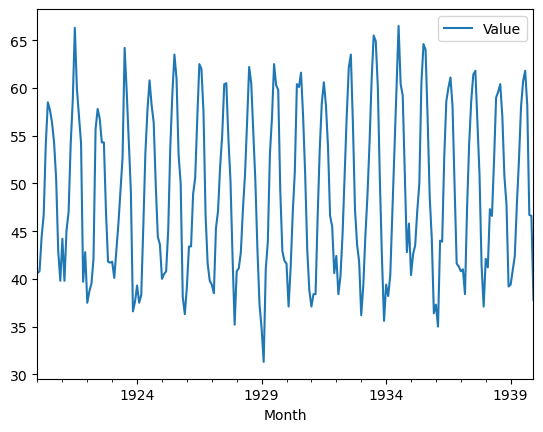

----------
            Value
Month            
1966-01-01     41
1966-02-01     39
1966-03-01     50
1966-04-01     40
1966-05-01     43
...           ...
1975-06-01    316
1975-07-01    398
1975-08-01    394
1975-09-01    431
1975-10-01    431

[118 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64
Единичные корни есть, ряд нестационарный


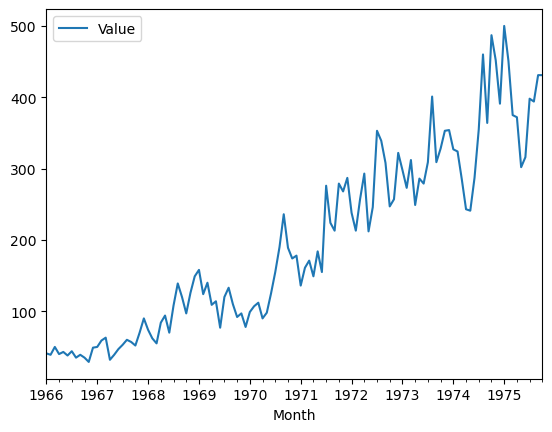

----------
            Value
Month            
1965-01-01    154
1965-02-01     96
1965-03-01     73
1965-04-01     49
1965-05-01     36
...           ...
1971-01-01    628
1971-02-01    308
1971-03-01    324
1971-04-01    248
1971-05-01    272

[77 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Единичные корни есть, ряд нестационарный


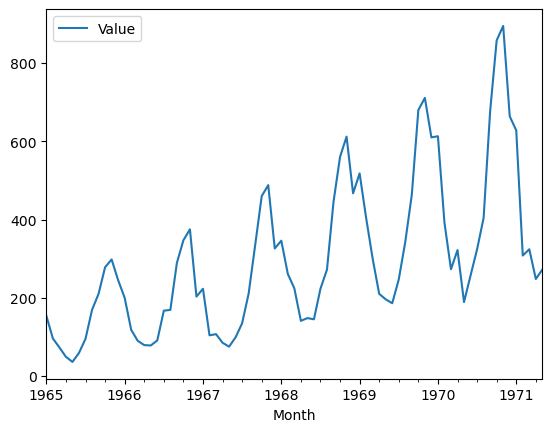

----------
             Value
Week              
1971-07-05  890.19
1971-07-12  901.80
1971-07-19  888.51
1971-07-26  887.78
1971-08-02  858.43
...            ...
1974-07-15  791.77
1974-07-22  787.23
1974-07-29  787.94
1974-08-05  784.57
1974-08-12  752.58

[162 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64
Единичные корни есть, ряд нестационарный


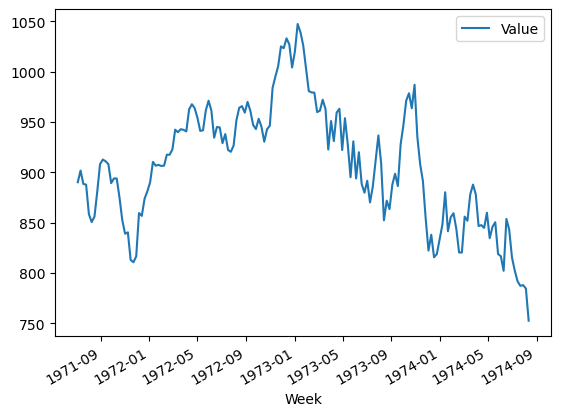

----------


In [4]:
#Тест Дики-Фулера
"""H1-ряд нестационарный
   H0-ряд стационарный
   Если Test Statistic > Critical Value (5%), то гипотеза H0 отвергается и принимается альтернативная.
   После проверки выяснилось, что df3,df4 и df5 -- нестационарны
"""
def test_stationarity(*dfs):
    for df in dfs:
        print(df)
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(df, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
        for [key, value] in dftest[4].items():
            dfoutput['Critical Value (%s)' % key] = value
        print(dfoutput)
        if dfoutput['Test Statistic'] > dfoutput['Critical Value (5%)']:
            print("Единичные корни есть, ряд нестационарный")
        else:
            print("Единичных корней нет, ряд стационарный")
        df.plot()
        plt.show()
        print('----------')
    
df_fuller = test_stationarity(df1, df2, df3, df4, df5)
df_fuller

            Value
Date             
1959-01-01     35
1959-01-02     32
1959-01-03     30
1959-01-04     31
1959-01-05     44
...           ...
1959-12-27     37
1959-12-28     52
1959-12-29     48
1959-12-30     55
1959-12-31     50

[365 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64
Единичных корней нет, ряд стационарный


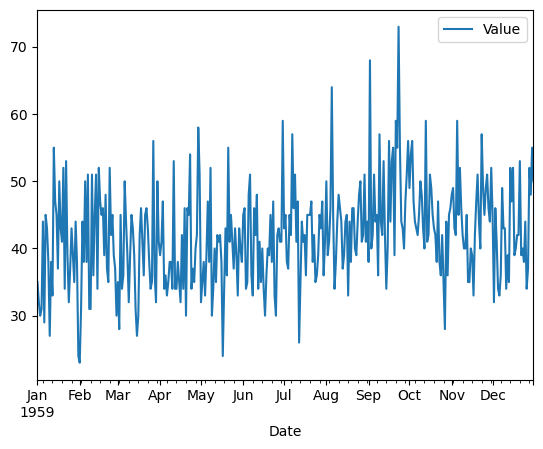

----------
            Value
Month            
1920-01-01   40.6
1920-02-01   40.8
1920-03-01   44.4
1920-04-01   46.7
1920-05-01   54.1
...           ...
1939-08-01   61.8
1939-09-01   58.2
1939-10-01   46.7
1939-11-01   46.6
1939-12-01   37.8

[240 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64
Единичных корней нет, ряд стационарный


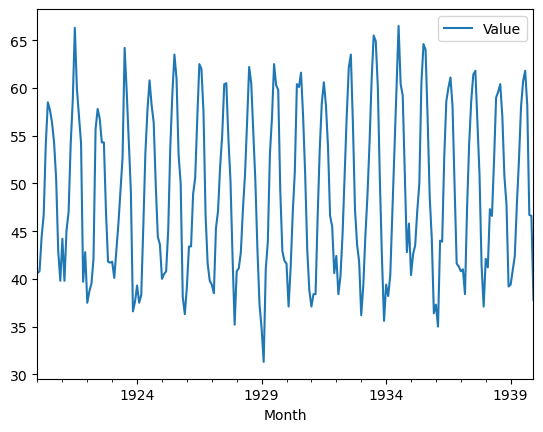

----------
               Value
Month               
1966-02-01 -0.050010
1966-03-01  0.248461
1966-04-01 -0.223144
1966-05-01  0.072321
1966-06-01 -0.123614
...              ...
1975-06-01  0.045315
1975-07-01  0.230710
1975-08-01 -0.010101
1975-09-01  0.089757
1975-10-01  0.000000

[117 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64
Единичных корней нет, ряд стационарный


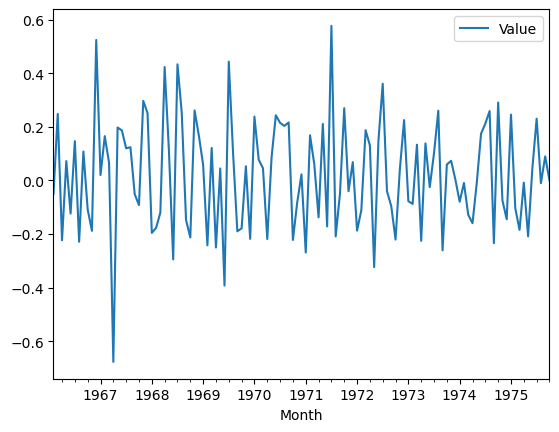

----------
               Value
Month               
1965-02-01 -0.472604
1965-03-01 -0.273889
1965-04-01 -0.398639
1965-05-01 -0.308301
1965-06-01  0.494019
...              ...
1971-01-01 -0.055742
1971-02-01 -0.712440
1971-03-01  0.050644
1971-04-01 -0.267315
1971-05-01  0.092373

[76 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64
Единичных корней нет, ряд стационарный


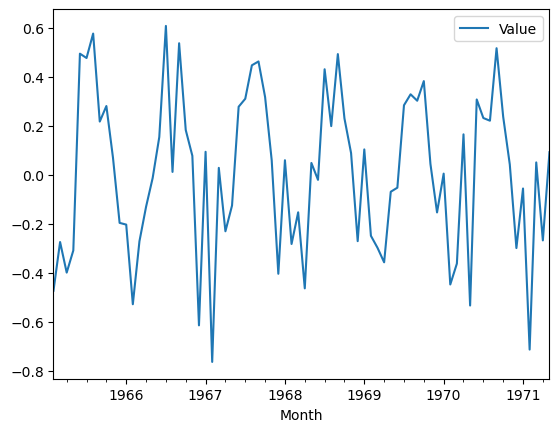

----------
               Value
Week                
1971-07-12  0.012958
1971-07-19 -0.014847
1971-07-26 -0.000822
1971-08-02 -0.033619
1971-08-09 -0.009151
...              ...
1974-07-15 -0.013349
1974-07-22 -0.005750
1974-07-29  0.000901
1974-08-05 -0.004286
1974-08-12 -0.041628

[161 rows x 1 columns]
Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64
Единичных корней нет, ряд стационарный


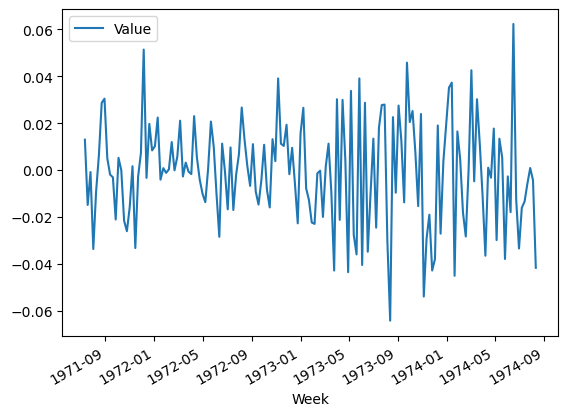

----------


In [7]:
# функция для приведения ряда к стационарности
def log_diff(*dfs):
    result = []
    for df in dfs:
        df_copy = df.copy()  # создаем копию датафрейма, чтобы не менять оригинальные
        df_copy = np.log(df_copy)
        df_copy = df_copy.diff()
        df_copy = df_copy.dropna()
                #df_copy[col].plot()
                #plt.show()
        result.append(df_copy)        
    return result

dfs_stat = log_diff(df3,df4,df5)
dfs_stat = [df1, df2, *dfs_stat] #создаем переменную, где будут только стац. ряды, причем df1 и df2 -- оригинальные
dfs_non_stat = [df3, df4, df5]#создаем переменную, где будут только нестац.ряды

for df in dfs_stat:
    test_stationarity(df)

## Этап 1. Вывод
1. Дата фреймы приведены к одному типу дат, даты переведены в индексы, колонки со значениями имеют единое название -- Value
2. Проведен тест Дики-Фулера. df3,df4,df5 -- нестационарные ряды
3. Написана функция log_diff, которая преобразует стационарные ряды в нестационарные путем взятия лог значения и вычитания разности. **Результат: Все ряды стали стационарными**
4. Стационарные ряды сохранены в одну переменную, а нестационарные в другую. Сделано для упрощения дальнейшего анализа

## Этап 2

Dataframe 1:


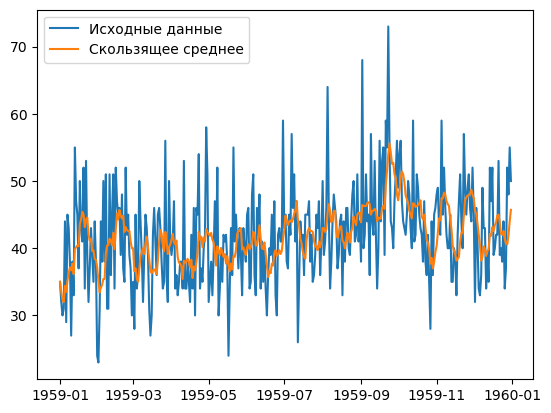

MAE: 5.1153
MSE: 40.7804
RMSE: 6.3859
R2: 0.2338

Dataframe 2:


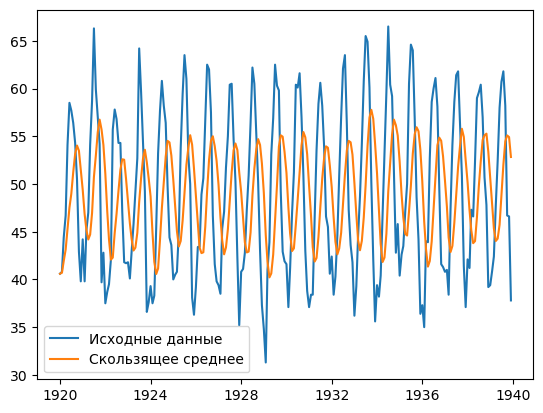

MAE: 8.4923
MSE: 91.6172
RMSE: 9.5717
R2: -0.2414

Dataframe 3:


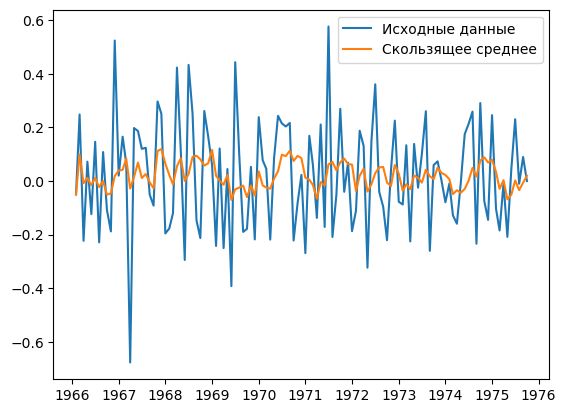

MAE: 0.1596
MSE: 0.0382
RMSE: 0.1956
R2: 0.1153

Dataframe 4:


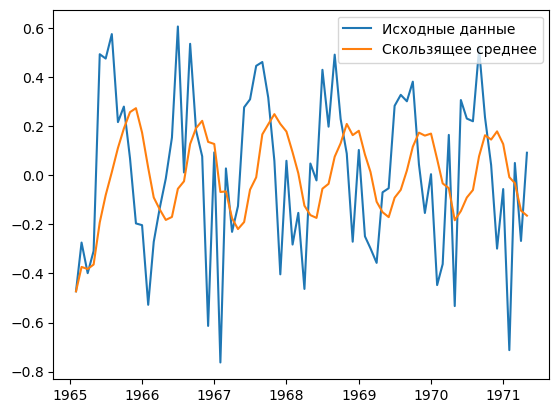

MAE: 0.2768
MSE: 0.1097
RMSE: 0.3312
R2: -0.1293

Dataframe 5:


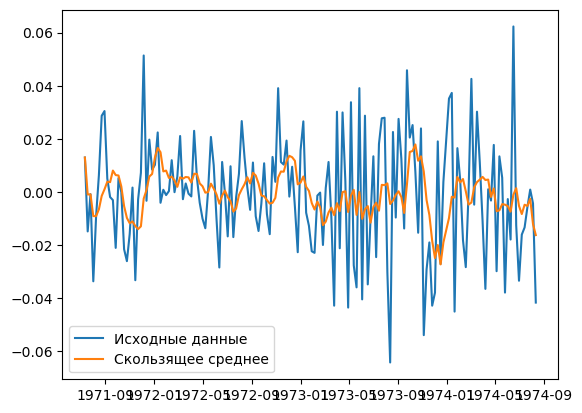

MAE: 0.0163
MSE: 0.0004
RMSE: 0.0210
R2: 0.1060

Dataframe 6:


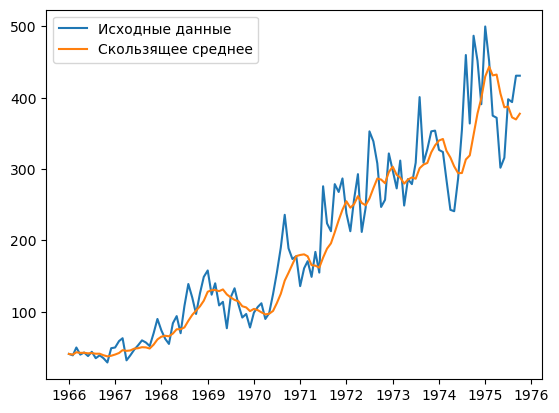

MAE: 28.7233
MSE: 1674.5233
RMSE: 40.9209
R2: 0.8933

Dataframe 7:


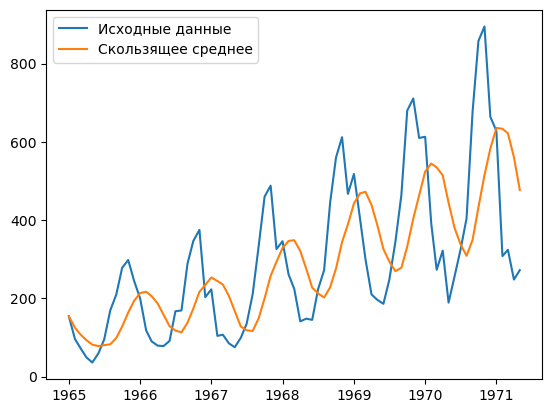

MAE: 143.4286
MSE: 30470.0641
RMSE: 174.5568
R2: 0.1849

Dataframe 8:


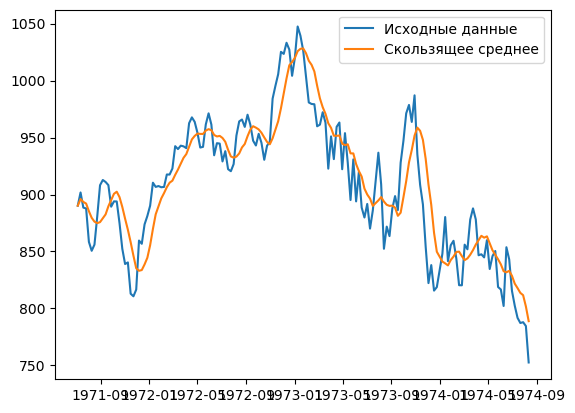

MAE: 21.6321
MSE: 699.6449
RMSE: 26.4508
R2: 0.8135



In [8]:
#Скользящее среднее
def rolling_mean(*dfs, window=7):


    rolling_means = []
    
    for i, df in enumerate(dfs):
        df_copy = df.copy()
        # Вычисляем скользящее среднее
        rolling_mean = df_copy.rolling(window=window, min_periods=1).mean()

        # Выводим номер датафрейма
        print(f"Dataframe {i+1}:")
        
        # Отрисовываем график
        plt.plot(df_copy, label='Исходные данные')
        plt.plot(rolling_mean, label='Скользящее среднее')
        plt.legend()
        plt.show()

        # Вычисляем метрики качества
        mae = mean_absolute_error(df_copy[window:], rolling_mean[window:])
        mse = mean_squared_error(df_copy[window:], rolling_mean[window:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[window:], rolling_mean[window:])

        # Выводим метрики качества
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")
        print()

        rolling_means.append(rolling_mean)
        
    return rolling_means

rolling_means = rolling_mean(*dfs_stat, *dfs_non_stat)

In [ ]:
### Пояснения

"""
Dataframe 1-5 -- стационарные ряды, 6-8 -- нестационарные.
Описание метрик:
Если говорить о метриках MAE, MSE, RMSE, то у стационарных временных рядов они имеют наименьшие значения,
что дает нам хороший результат. Однако коэффициент детерминации(R2) у стационарных рядов отрицательный и меньше, 
чем у нестационарных и, таким образом,данная модель плохо объясняет вариацию данных для стационарных рядов.
"""

Dataframe 1:


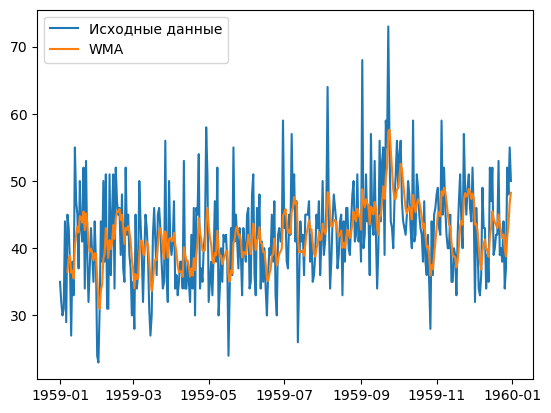

MAE: 4.4968
MSE: 31.3245
RMSE: 5.5968
R2: 0.4115
Dataframe 2:


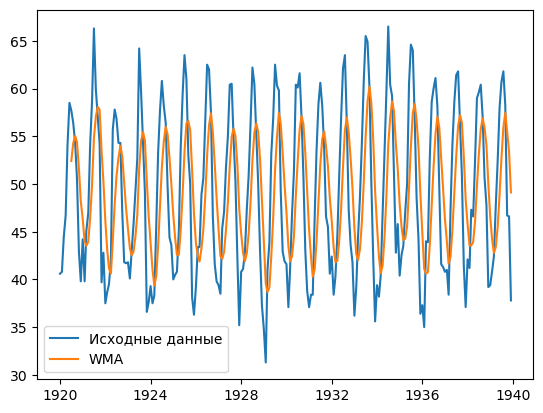

MAE: 6.1576
MSE: 49.8132
RMSE: 7.0578
R2: 0.3250
Dataframe 3:


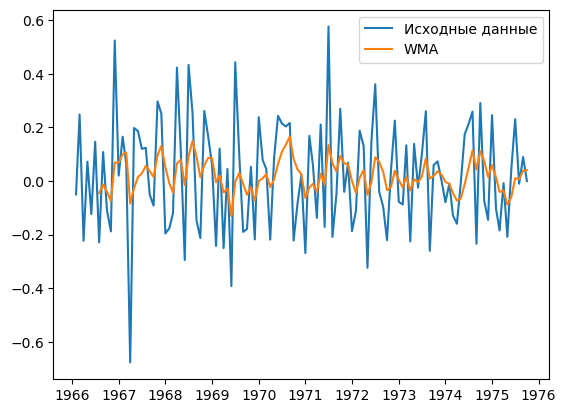

MAE: 0.1459
MSE: 0.0319
RMSE: 0.1787
R2: 0.2613
Dataframe 4:


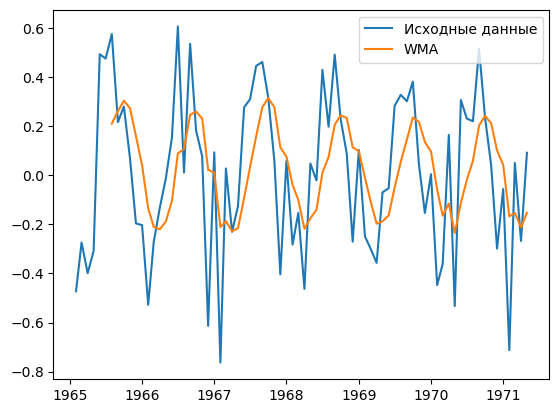

MAE: 0.2176
MSE: 0.0689
RMSE: 0.2624
R2: 0.2912
Dataframe 5:


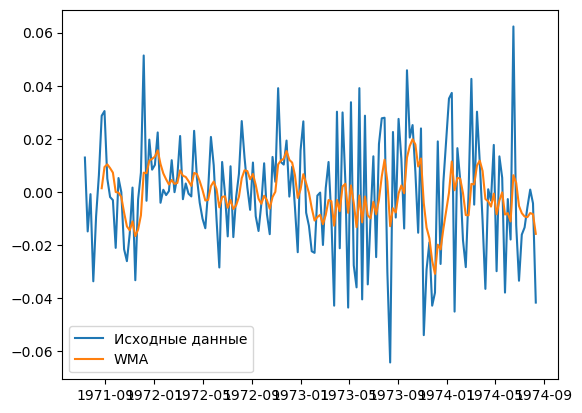

MAE: 0.0144
MSE: 0.0003
RMSE: 0.0185
R2: 0.3112
Dataframe 6:


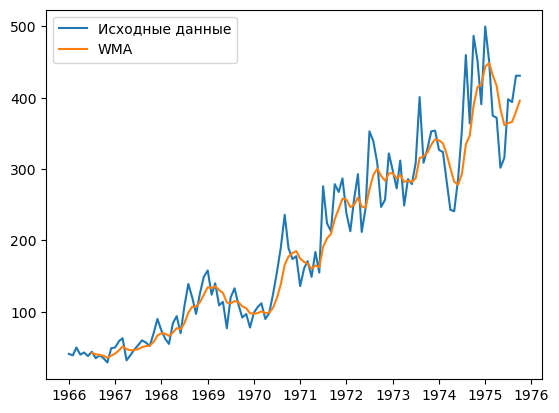

MAE: 23.4122
MSE: 1081.9055
RMSE: 32.8923
R2: 0.9310
Dataframe 7:


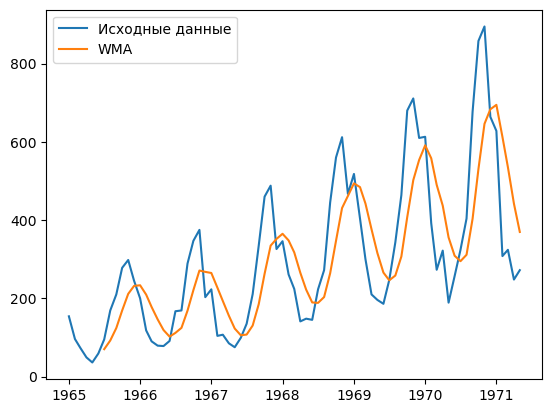

MAE: 105.0505
MSE: 16836.9917
RMSE: 129.7574
R2: 0.5496
Dataframe 8:


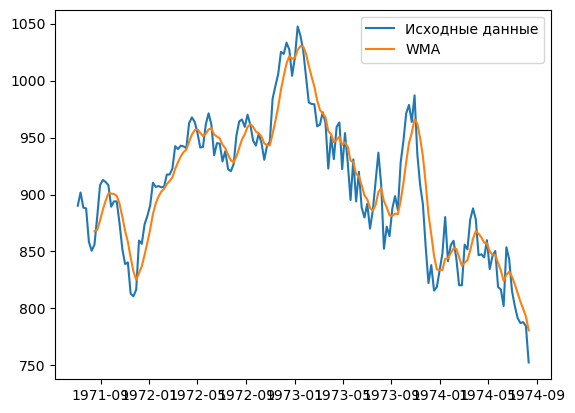

MAE: 16.2553
MSE: 393.7441
RMSE: 19.8430
R2: 0.8951


In [9]:
#Взвешенное скользящее среднее
def wma(*dfs, window=7):
    w = np.arange(1, window+1)
    w = w / w.sum()  # Вычисляем веса

    rolling_means = []

    for i, df in enumerate(dfs):
        df_copy = df.copy()

        # Вычисляем взвешенное скользящее среднее
        rolling_mean = df_copy.rolling(window=window, min_periods=window).apply(lambda x: (x * w).sum())
        
        print(f"Dataframe {i+1}:")


        plt.plot(df_copy, label='Исходные данные')
        plt.plot(rolling_mean, label='WMA')
        plt.legend()
        plt.show()

        mae = mean_absolute_error(df_copy[window:], rolling_mean[window:])
        mse = mean_squared_error(df_copy[window:], rolling_mean[window:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[window:], rolling_mean[window:])

 
        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        rolling_means.append(rolling_mean[window-1:])

    return rolling_means

wma_values = wma(*dfs_stat, *dfs_non_stat)


In [ ]:
### Пояснения

"""
Описание метрик:
Хотя R2 у стационарных рядов уже не принимает отрицательные значение, но он не выше, чем у стационарных рядов. По прежнему
метрики MAE, MSE, RMSE меньше, чем у нестационарных рядов, что говорит нам о том, что для стационарных рядов
модель WMA лучше, чем MA.
"""

Dataframe 1:


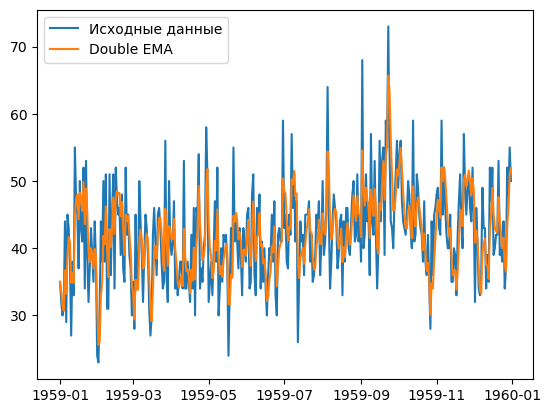

MAE: 3.6032
MSE: 20.0578
RMSE: 4.4786
R2: 0.6276
Dataframe 2:


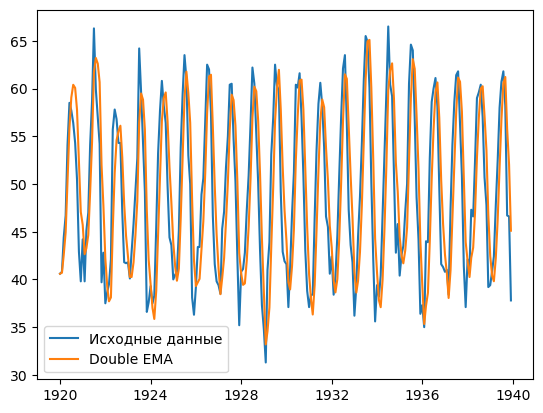

MAE: 4.6272
MSE: 28.8923
RMSE: 5.3752
R2: 0.6050
Dataframe 3:


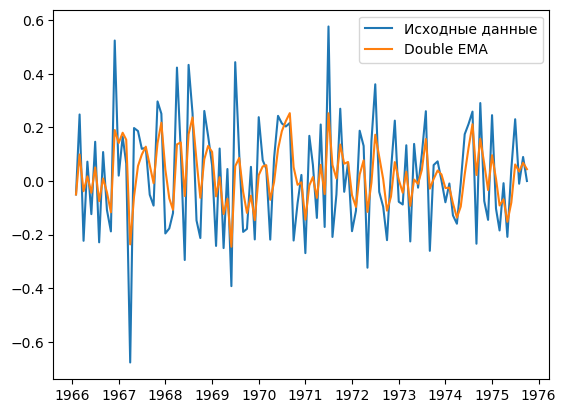

MAE: 0.1144
MSE: 0.0202
RMSE: 0.1421
R2: 0.5286
Dataframe 4:


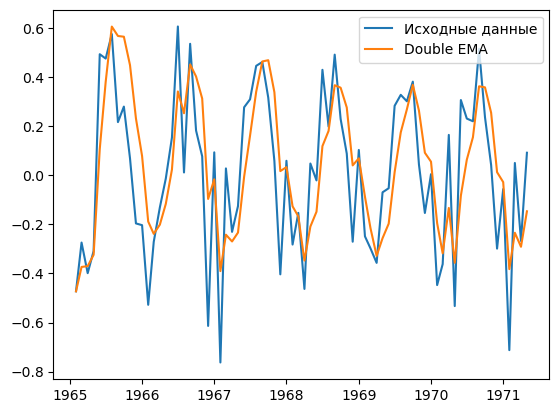

MAE: 0.1788
MSE: 0.0473
RMSE: 0.2175
R2: 0.5464
Dataframe 5:


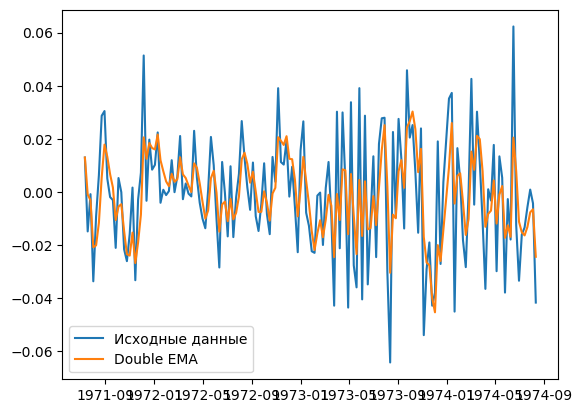

MAE: 0.0117
MSE: 0.0002
RMSE: 0.0147
R2: 0.5573
Dataframe 6:


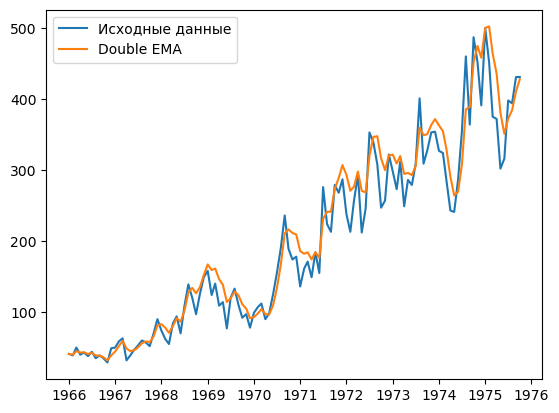

MAE: 21.1304
MSE: 821.5926
RMSE: 28.6634
R2: 0.9492
Dataframe 7:


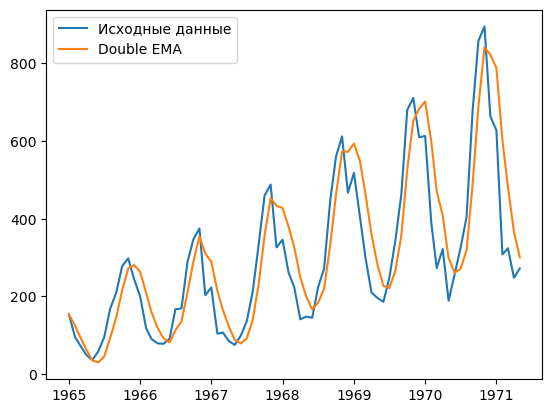

MAE: 79.7947
MSE: 9377.1654
RMSE: 96.8358
R2: 0.7602
Dataframe 8:


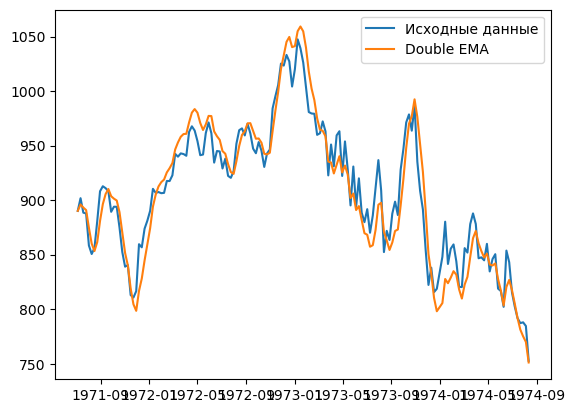

MAE: 15.0241
MSE: 346.4953
RMSE: 18.6144
R2: 0.9056


In [10]:
#Двойное Экспоненциальное сглаживание
def double_ema_values(*dfs, alpha=0.3, beta=0.1):

    ema1_values = []
    ema2_values = []
    double_ema_values = []

    for i, df in enumerate(dfs):
        df_copy = df.copy()

        ema1 = df_copy.ewm(alpha=alpha, adjust=False).mean()
        ema2 = df_copy.ewm(alpha=beta, adjust=False).mean()
        double_ema = 2 * ema1 - ema2
        
        print(f"Dataframe {i+1}:")

        plt.plot(df_copy, label='Исходные данные')
        plt.plot(double_ema, label='Double EMA')
        plt.legend()
        plt.show()

        mae = mean_absolute_error(df_copy[1:], double_ema[1:])
        mse = mean_squared_error(df_copy[1:], double_ema[1:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[1:], double_ema[1:])

        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        ema1_values.append(ema1)
        ema2_values.append(ema2)
        double_ema_values.append(double_ema)

    return double_ema_values

des_values =  double_ema_values(*dfs_stat, *dfs_non_stat)


In [ ]:
"""
Описание метрик:
Можно заметить, что результаты метрики R2 для стационарных рядов увеличились, по сравнению с моделями MA и WMA
"""

Dataframe 1:


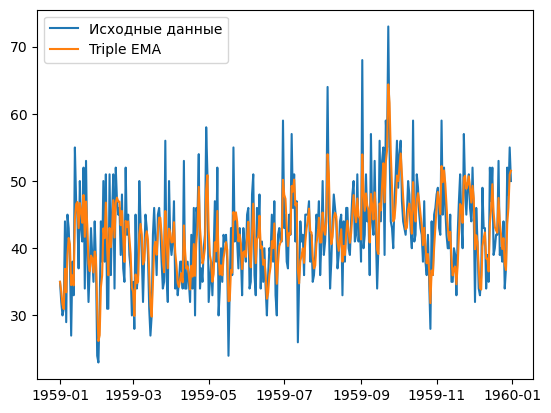

MAE: 3.4340
MSE: 18.2394
RMSE: 4.2708
R2: 0.6606
Dataframe 2:


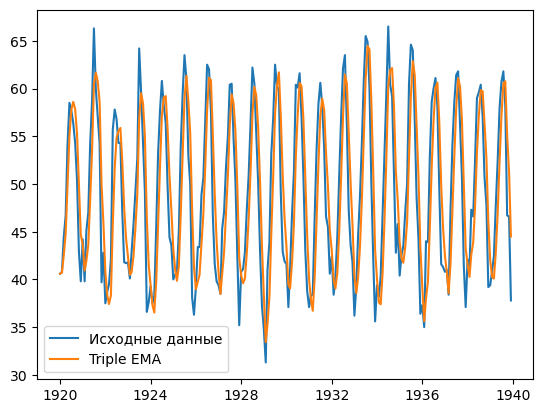

MAE: 4.1212
MSE: 22.8964
RMSE: 4.7850
R2: 0.6870
Dataframe 3:


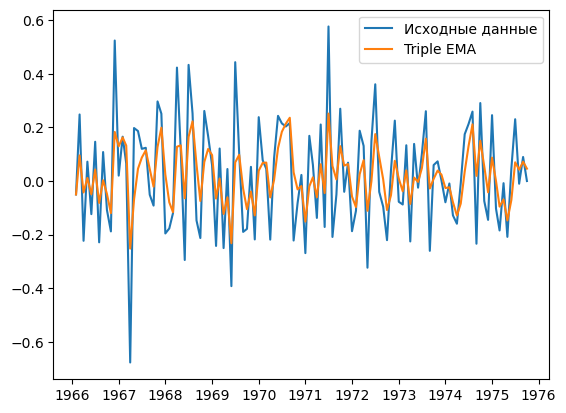

MAE: 0.1125
MSE: 0.0196
RMSE: 0.1402
R2: 0.5405
Dataframe 4:


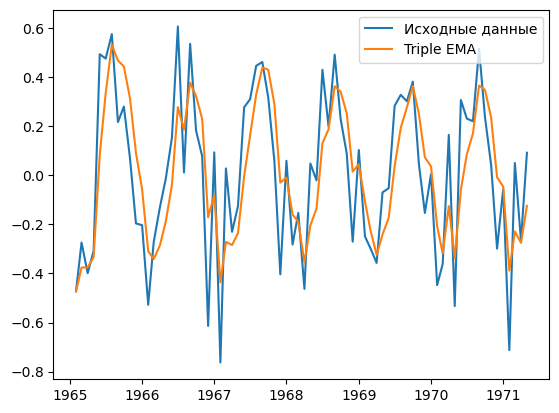

MAE: 0.1663
MSE: 0.0388
RMSE: 0.1969
R2: 0.6291
Dataframe 5:


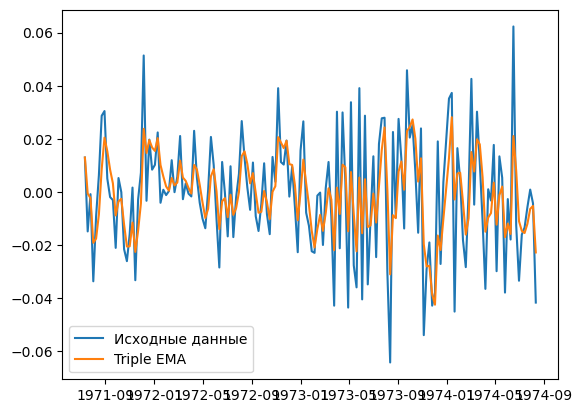

MAE: 0.0113
MSE: 0.0002
RMSE: 0.0143
R2: 0.5876
Dataframe 6:


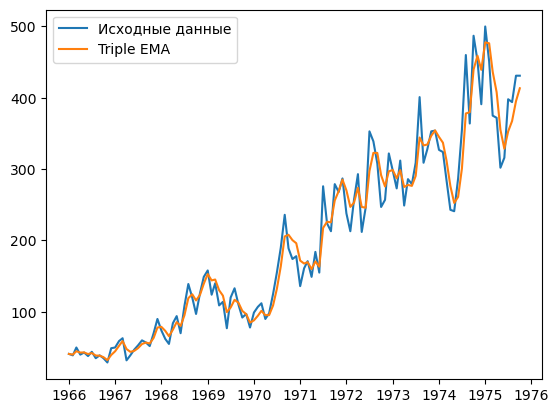

MAE: 16.6305
MSE: 528.6454
RMSE: 22.9923
R2: 0.9672
Dataframe 7:


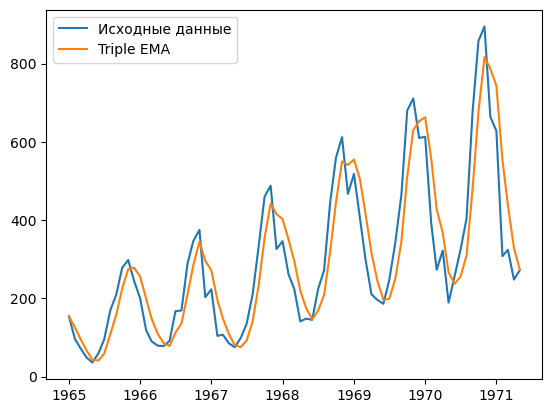

MAE: 69.5236
MSE: 7122.7969
RMSE: 84.3967
R2: 0.8176
Dataframe 8:


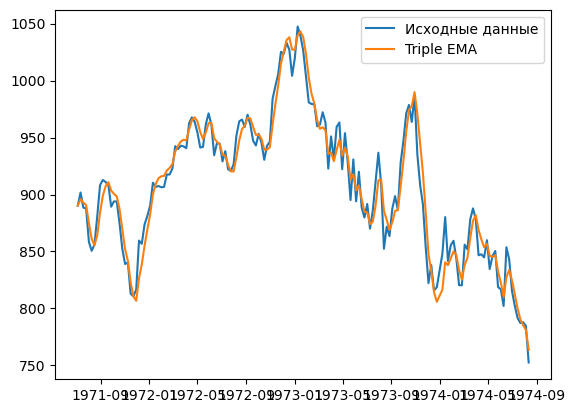

MAE: 10.3069
MSE: 171.8821
RMSE: 13.1104
R2: 0.9535


In [11]:
#Тройное экспоненциальное сглаживание
def triple_ema(*dfs, alpha=0.2, beta=0.2, gamma=0.2):
    ema1_values = []
    ema2_values = []
    ema3_values = []
    triple_ema_values = []

    for i, df in enumerate(dfs):
        df_copy = df.copy()

        ema1 = df_copy.ewm(alpha=alpha, adjust=False).mean()
        ema2 = ema1.ewm(alpha=beta, adjust=False).mean()
        ema3 = ema2.ewm(alpha=gamma, adjust=False).mean()
        triple_ema = 3 * ema1 - 3 * ema2 + ema3

        print(f"Dataframe {i+1}:")
        
        plt.plot(df_copy, label='Исходные данные')
        plt.plot(triple_ema, label='Triple EMA')
        plt.legend()
        plt.show()

        mae = mean_absolute_error(df_copy[2:], triple_ema[2:])
        mse = mean_squared_error(df_copy[2:], triple_ema[2:])
        rmse = np.sqrt(mse)
        r2 = r2_score(df_copy[2:], triple_ema[2:])

        print(f"MAE: {mae:.4f}")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R2: {r2:.4f}")

        ema1_values.append(ema1)
        ema2_values.append(ema2)
        ema3_values.append(ema3)
        triple_ema_values.append(triple_ema)

    return triple_ema_values
tes_values =  triple_ema(*dfs_stat, *dfs_non_stat)


In [ ]:
#Итоговый вывод для этапа 2:
"""
C увеличением степени сглаживания значения метрик MAE, MSE, RMSE, уменьшается, а значение метрики R2 увеличивается,
что говорит нам о том, что наиболее подходящая модель приближения временных рядов является TEMA(Тройное экпоненциальное сглаживание).
Данная модель хорошо подходит как для стационарных , так и для нестационарных временных рядов.

"""